# UAE_USED_CAR_PRICE_PREDICTION

### Life cycle of Machine Learning Project

- Understanding the Problem Statements
- Data Collection
- Data check to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Traning
- Choose Best Model

### 1.) Problem Statement

- This project aims to analyze the factors influencing used car prices in the UAE Market. 
   By examing various attributes, we seek to develop  a predictive model that assists buyer 
   and sellers in making informed pricing decisions, ultimately enhancing market transparency and effiency,

### 2.) Data Collection

- Data Soruce = https://www.kaggle.com/datasets/mohamedsaad254/uae-used-cars-analysis-full-project-v1-0
- Data consist 10 column and 10000 rows.

#### 2.1) Import Data and Required Packages
- a.) import Pandas, Numpy, matplotlib and seaborn ,etc

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
import matplotlib.colors as mcolors
import warnings
warnings.filterwarnings("ignore")

- b.) import the CSV data as Pandas DataFrame

In [2]:
df = pd.read_csv("data/uae_used_cars_10k.csv")

- c.) Show Top 5 Records

In [3]:
df.head()

,Make,Model,Year,Price,Mileage,Body_Type,Cylinders,Transmission,Fuel_Type,Color,Location,Description
0,toyota,camry,2016,47819,156500,Sedan,4,Automatic Transmission,Gasoline,Black,Dubai,"2016 toyota camry with Rear camera, Leather se..."
1,kia,sorento,2013,61250,169543,SUV,4,Automatic Transmission,Gasoline,Grey,Abu Dhabi,"2013 kia sorento with Sunroof, Adaptive cruise..."
2,mini,cooper,2023,31861,221583,Soft Top Convertible,4,Automatic Transmission,Gasoline,Grey,Dubai,"2023 mini cooper with Adaptive cruise control,..."
3,nissan,altima,2016,110322,69754,Sedan,4,Automatic Transmission,Gasoline,Red,Dubai,"2016 nissan altima with Rear camera, Adaptive ..."
4,toyota,land-cruiser-76-series,2020,139994,71399,Pick Up Truck,4,Manual Transmission,Gasoline,White,Dubai,2020 toyota land-cruiser-76-series with Adapti...


- d.) Shape of Dataset

In [4]:
df.shape

(10000, 12)

### 2.2 Dataset information
- Make
- Model
- Year
- Price
- Mileage
- Body Type
- Cylinders
- Transmission
- Fuel Type
- Color
- location
- Description

### 3. Data Checks to perform
- Check Missing Value
- Check Duplicate
- Check data type
- Check the number of unique values of each column
- Check Statistic of dataset
- Check various categories present in the different categorical column

#### 3.1 Check Missing values

In [5]:
df.isna().sum()

Make              0
Model             0
Year              0
Price             0
Mileage           0
Body_Type         0
Cylinders       105
Transmission      0
Fuel_Type         0
Color             0
Location          0
Description       0
dtype: int64

There are 105 missing values in Cylinders columns.

3.2 We Fill missing values in Cylinders Columns.

In [6]:
df = df.drop(columns=['Cylinders', 'Color','Description'])

In [7]:
df.isna().sum()

Make            0
Model           0
Year            0
Price           0
Mileage         0
Body_Type       0
Transmission    0
Fuel_Type       0
Location        0
dtype: int64

3.3 Check Duplicates

In [8]:
df.duplicated().sum()

np.int64(0)

There are no duplicated values in the data set

3.4 Check Data types

In [9]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Make          10000 non-null  object
 1   Model         10000 non-null  object
 2   Year          10000 non-null  int64 
 3   Price         10000 non-null  int64 
 4   Mileage       10000 non-null  int64 
 5   Body_Type     10000 non-null  object
 6   Transmission  10000 non-null  object
 7   Fuel_Type     10000 non-null  object
 8   Location      10000 non-null  object
dtypes: int64(3), object(6)
memory usage: 703.2+ KB


3.5 Checking the number of Unique values of each column

In [10]:
df.nunique()

Make              65
Model            488
Year              20
Price           9848
Mileage         9834
Body_Type         13
Transmission       2
Fuel_Type          4
Location          16
dtype: int64

3.6 Check Statistics of Dataset

In [11]:
df.describe()

,Year,Price,Mileage
count,10000.000000,1.000000e+04,10000.000000
mean,2014.472800,2.452345e+05,155161.871700
std,5.790839,4.709773e+05,83681.858983
min,2005.000000,7.183000e+03,10006.000000
25%,2009.000000,5.035250e+04,82904.000000
50%,2014.000000,1.027660e+05,154370.500000
75%,2019.000000,2.312480e+05,227551.250000
max,2024.000000,1.468698e+07,299996.000000


### Insight

1.) Year Range :- 
- The dataset features used car spanning nearly two decades, from 2005 to 2024. This range allows us to  analyze trends in pricing  and features
across different model years. 

2.) Average Price :-
- On Average, Used cars are priced around 245,334 AED. However, the high standard deviation indicates that prices vary greatly, likely due to factors such as brand, model, condition, and mileage.

3.) Mileage Insights :-
- The average mileage of the cars is approximately 155,138 km, but we see a wide range from just 10,006 km to nearly 300,000 km. This suggests that while some cars are lightly used, others have been driven extensively, which can significantly impact their resale value.

4.) Price Distribution :-
- The price distribution shows that half of the cars are priced below 229,545 AED, with a quarter of them costing less than 49,916 AED. This information is crucial for buyers looking for budget-friendly options.

5.) Recent Models :-
- With  a median year of 2014, we can infer that the majority of cars fairly recent models, which may come with updated features and technology, appealing to buyers looking  for modern vehicles.

3.8 Exploring Data

In [12]:
df.head()

,Make,Model,Year,Price,Mileage,Body_Type,Transmission,Fuel_Type,Location
0,toyota,camry,2016,47819,156500,Sedan,Automatic Transmission,Gasoline,Dubai
1,kia,sorento,2013,61250,169543,SUV,Automatic Transmission,Gasoline,Abu Dhabi
2,mini,cooper,2023,31861,221583,Soft Top Convertible,Automatic Transmission,Gasoline,Dubai
3,nissan,altima,2016,110322,69754,Sedan,Automatic Transmission,Gasoline,Dubai
4,toyota,land-cruiser-76-series,2020,139994,71399,Pick Up Truck,Manual Transmission,Gasoline,Dubai


In [13]:
df.shape

(10000, 9)

In [14]:
print("categories in 'Make' variable:    ", end=" ")
print(df['Make'].unique())

print("categories in 'Model' variable:  ", end=" ")
print(df['Model'].unique())

print("categories in 'Year' variable:   ", end=" ")
print(df['Year'].unique())

print("categories in 'Transmission' variable: ", end=" ")
print(df['Transmission'].unique())

print("categories in 'Fuel_Type' variable: ", end=" ")
print(df['Fuel_Type'].unique())

print("categories in 'Body_Type' variable: ", end=" ")
print(df['Body_Type'].unique())

print("categories in 'Location' variable: ", end=" ")
print(df['Location'].unique())

categories in 'Make' variable:     ['toyota' 'kia' 'mini' 'nissan' 'chevrolet' 'cadillac' 'mercedes-benz'
 'infiniti' 'mazda' 'jeep' 'ferrari' 'bmw' 'porsche' 'bentley'
 'land-rover' 'honda' 'dodge' 'rolls-royce' 'ford' 'hyundai' 'lamborghini'
 'mitsubishi' 'aston-martin' 'gmc' 'renault' 'volkswagen' 'lexus' 'suzuki'
 'lincoln' 'audi' 'maybach' 'peugeot' 'jaguar' 'citroen' 'maserati'
 'tesla' 'volvo' 'lotus' 'mclaren' 'alfa-romeo' 'fiat' 'chrysler' 'opel'
 'mercedes-maybach' 'geely' 'acura' 'subaru' 'genesis' 'isuzu'
 'westfield-sportscars' 'mg' 'hummer' 'skoda' 'mercury' 'rover' 'changan'
 'other-make' 'daihatsu' 'jetour' 'saab' 'gac' 'haval' 'baic' 'smart'
 'morgan']
categories in 'Model' variable:   ['camry' 'sorento' 'cooper' 'altima' 'land-cruiser-76-series' 'silverado'
 'camaro' 'srx' 'g-class' 'q50' 'land-cruiser' 'amg-gt-4-doors' '6'
 'x-trail' 'cls-class' 'patrol' 'yaris' 'grand-cherokee' 'optima' '599'
 'x6' 'cayenne' 'continental-gt' 'range-rover' 'sunny' 'gl-class'
 'corvet

In [15]:
# Define numerical & categorical features
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
Categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']


# print Columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('We have {} categorical features : {}'.format(len(Categorical_features), Categorical_features))   

We have 3 numerical features : ['Year', 'Price', 'Mileage']
We have 6 categorical features : ['Make', 'Model', 'Body_Type', 'Transmission', 'Fuel_Type', 'Location']


In [16]:
df.head(2)

,Make,Model,Year,Price,Mileage,Body_Type,Transmission,Fuel_Type,Location
0,toyota,camry,2016,47819,156500,Sedan,Automatic Transmission,Gasoline,Dubai
1,kia,sorento,2013,61250,169543,SUV,Automatic Transmission,Gasoline,Abu Dhabi


In [17]:
df['total_price'] = df['Price']

In [18]:
df.head(2)

,Make,Model,Year,Price,Mileage,Body_Type,Transmission,Fuel_Type,Location,total_price
0,toyota,camry,2016,47819,156500,Sedan,Automatic Transmission,Gasoline,Dubai,47819
1,kia,sorento,2013,61250,169543,SUV,Automatic Transmission,Gasoline,Abu Dhabi,61250


In [19]:
high_price_count = df[df['Price'] > 200000].count()['Price']
low_mileage_count = df[df['Mileage'] < 50000].count()['Mileage']

print(f"Number of cars with price greater than 200,000 AED: {high_price_count}")
print(f"Number of cars with mileage less than 50,000 KM: {low_mileage_count}")



Number of cars with price greater than 200,000 AED: 2846
Number of cars with mileage less than 50,000 KM: 1329


### Insights on High Price and Low Mileage Counts
1.) High Price Count:

- Output: Number of cars with price greater than 200,000 AED: 2,846
- Insight: A significant portion of the dataset (2,846 cars) is priced above 200,000 AED. This indicates that there is a substantial market for higher-end vehicles, which may include luxury cars or newer models. Buyers looking in this price range should be aware that they have many options, but they may also need to consider the features and conditions of these vehicles to ensure they are getting value for their investment.
2.) Low Mileage Count:

- Output: Number of cars with mileage less than 50,000 KM: 1,329
- Insight: There are 1,329 cars with mileage below 50,000 km, suggesting that a good number of vehicles in the dataset are relatively new or lightly used. This is appealing for buyers who prioritize low mileage, as these cars are likely to have less wear and tear and may require fewer repairs in the near future. Buyers should consider this factor when evaluating the overall condition and potential longevity of the vehicle.

3.) Market Implications:

- The presence of a large number of high-priced cars alongside a significant number of low-mileage vehicles suggests a diverse market. Buyers may find a range of options that cater to different preferences and budgets.
Sellers of high-priced cars may need to justify their pricing by highlighting features, condition, and low mileage to attract potential buyers.


In [20]:
low_price_count = df[df['Price'] < 50000].count()['Price']
high_mileage_count = df[df['Mileage'] > 200000].count()['Mileage']

print(f"Number of cars with price less than 50,000 AED: {low_price_count}")
print(f"Number of cars with mileage greater than 200,000 KM: {high_mileage_count}")

Number of cars with price less than 50,000 AED: 2477
Number of cars with mileage greater than 200,000 KM: 3484


### Insights on Low Price and High Mileage Counts

1.) Low Price Count:

- Output: Number of cars with price less than 50,000 AED: (2477)
- Insight: The count of cars priced below 50,000 AED indicates a segment of the market that is accessible to budget-conscious buyers. This suggests that there are options available for individuals looking for affordable vehicles, which may include older models or those with higher mileage. Buyers in this price range should be prepared to evaluate the condition and reliability of these vehicles carefully, as lower prices may correlate with potential maintenance needs.

2.)High Mileage Count:

- Output: Number of cars with mileage greater than 200,000 KM: (3484)
- Insight: The presence of cars with mileage exceeding 200,000 km suggests that there is a market for high-mileage vehicles, which may appeal to buyers looking for lower-priced options. However, high mileage often indicates that the vehicle has been used extensively, which could lead to increased wear and tear. Buyers should consider the maintenance history and overall condition of these cars, as they may require more frequent repairs or replacements.

3.) Market Implications:

- The availability of a significant number of low-priced and high-mileage cars indicates a diverse market catering to different buyer needs. While budget-friendly options are available, buyers should be cautious and conduct thorough inspections to ensure they are making sound investments.
Sellers of low-priced vehicles may need to highlight the condition and any recent maintenance work done to attract potential buyers, as price alone may not be enough to secure a sale.


In [21]:
# Calculate the median price and mileage
median_price = df['Price'].median()
median_mileage = df['Mileage'].median()
print(f'Median Price of Used Cars: {median_price} AED')
print(f'Median Mileage of Used Cars: {median_mileage} km')

Median Price of Used Cars: 102766.0 AED
Median Mileage of Used Cars: 154370.5 km


## Importance of the Median

1.) Robustness to Outliers:

- The median is less affected by extreme values (outliers) compared to the mean. In datasets with skewed distributions, such as car prices or mileage, the median provides a better central tendency measure.
- Example: If most cars are priced around 100,000 AED but a few luxury cars are priced at 1,000,000 AED, the mean price would be skewed upwards, while the median would still reflect the typical price more accurately.

2.) Understanding Distribution:

- The median helps in understanding the distribution of data. It divides the dataset into two equal halves, allowing you to see how many data points fall below or above a certain value.
- Example: Knowing the median price of used cars can help buyers understand what a typical car costs and whether they are looking at a fair price.

3.) Comparison Across Groups:

- When comparing different groups (e.g., different car brands, body types, or locations), the median can provide insights into which groups tend to have higher or lower prices or mileage.
- Example: You can compare the median prices of sedans versus SUVs to see which type generally costs more.

4.) Decision-Making:

- For buyers and sellers, understanding the median price can inform pricing strategies. Sellers can set competitive prices, while buyers can gauge whether a car is overpriced or a good deal.

### Univariate Analysis

- The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

#### Numerical Features

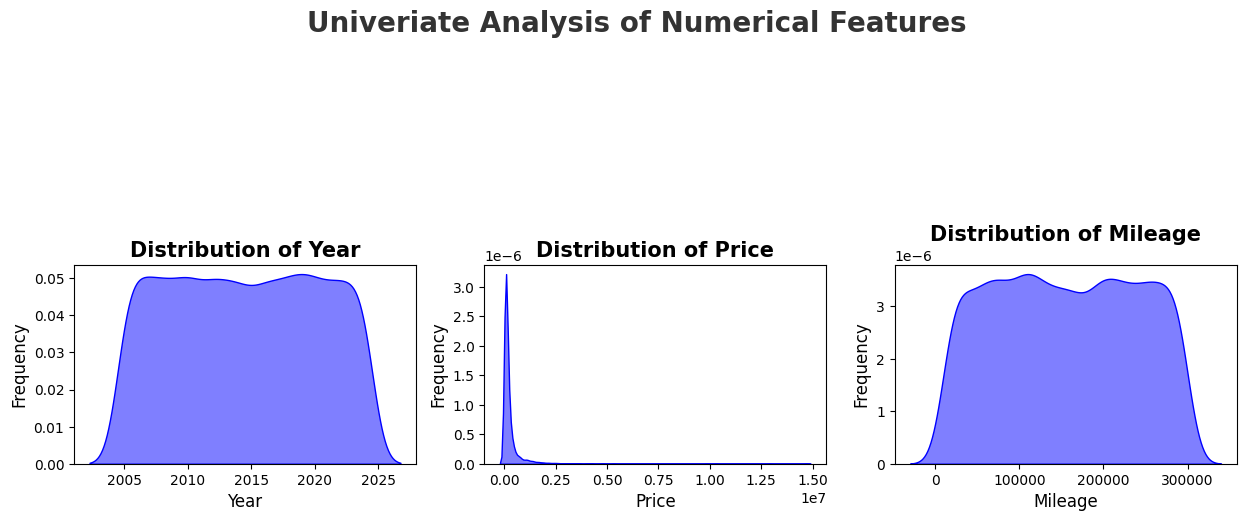

In [22]:
plt.figure(figsize=(15,15))
plt.suptitle('Univeriate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.05)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]], fill=True, color='blue', alpha=0.5)
    plt.title(f'Distribution of {numeric_features[i]}', fontsize=15, fontweight='bold')
    plt.xlabel(numeric_features[i], fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

#### Report

- Price has right skewed.
- Year and Mileage has Normal Distribution

#### Categorical Features

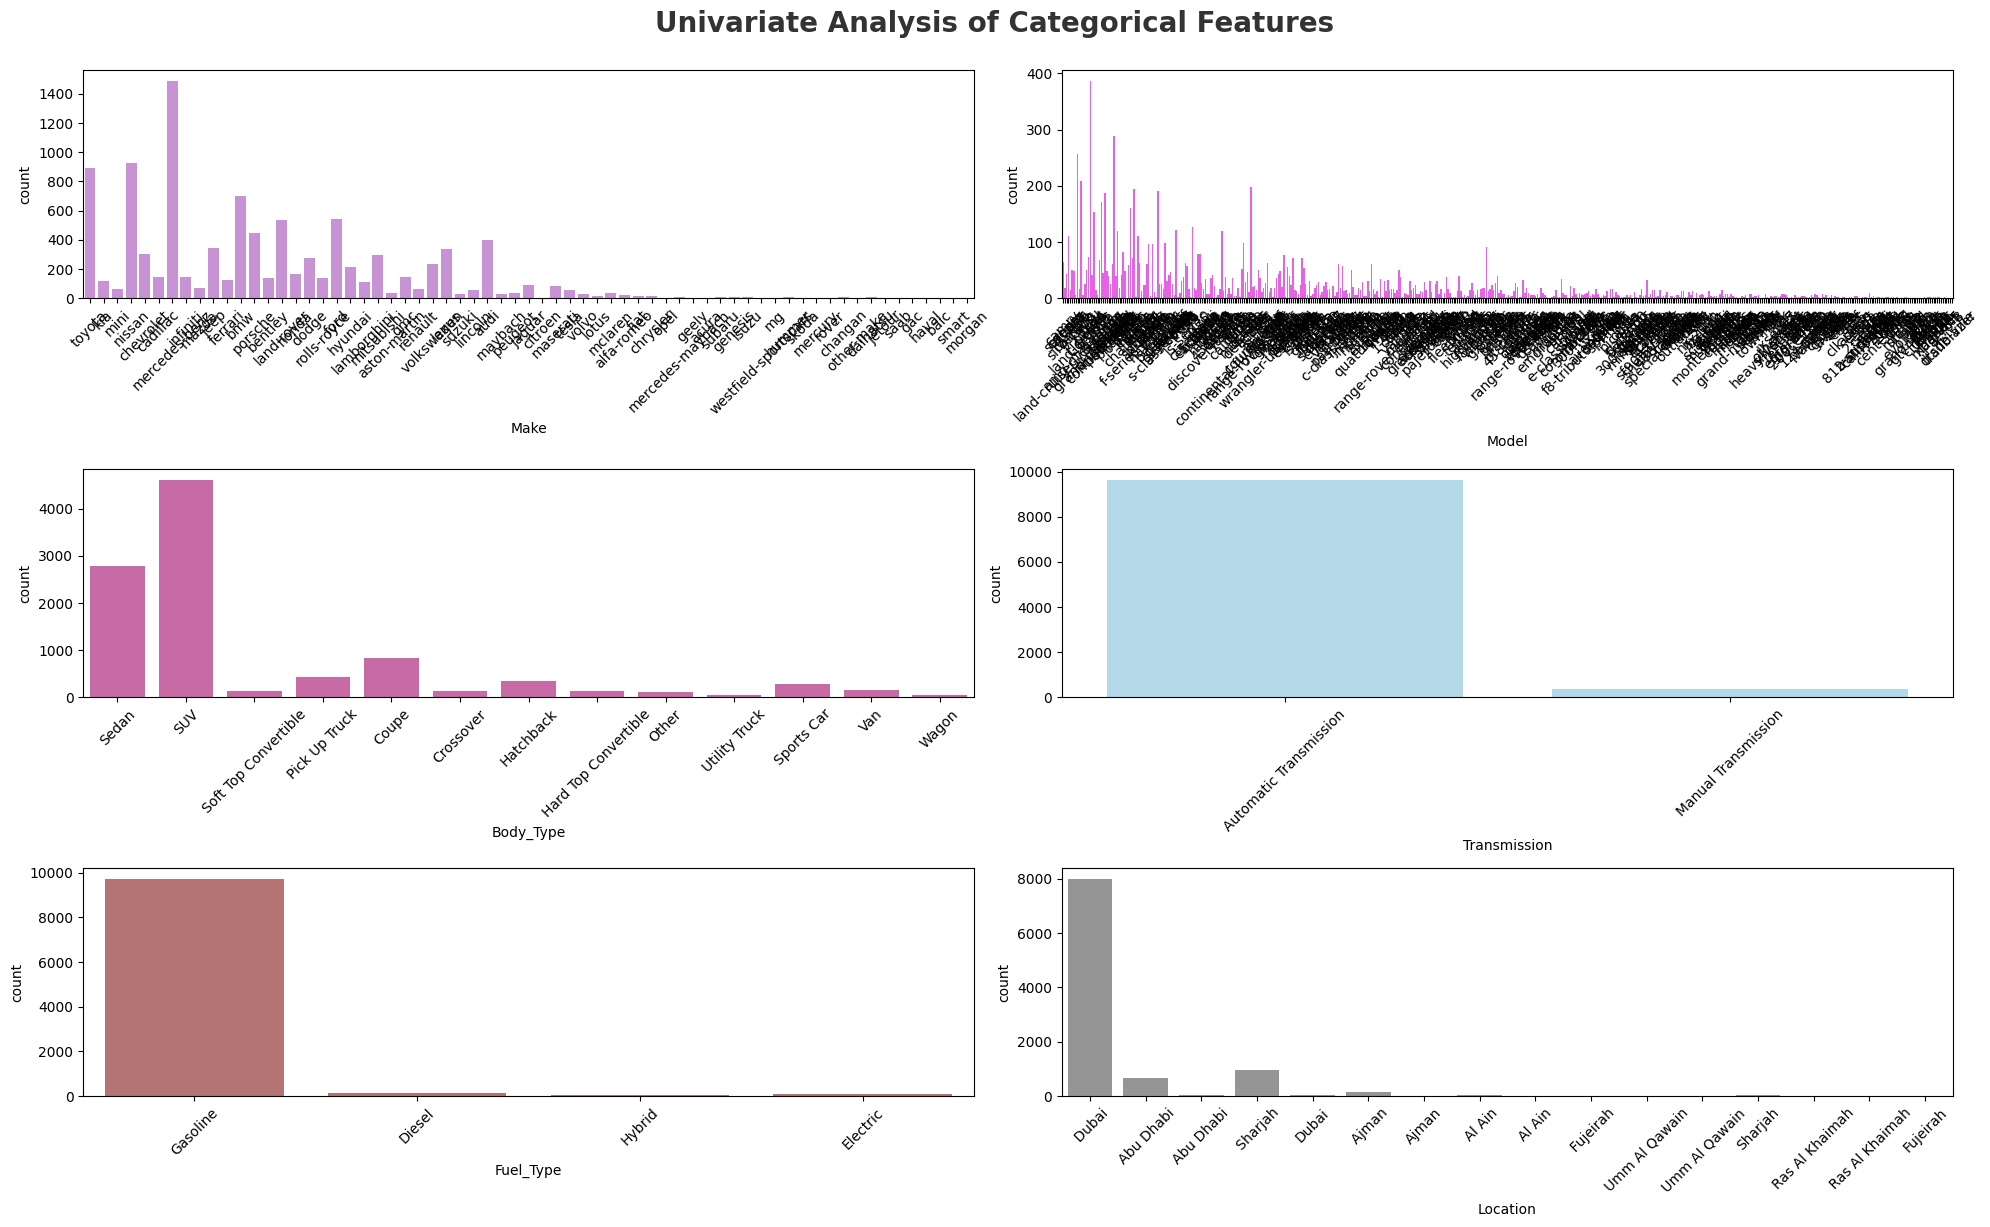

In [23]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(Categorical_features)):
    plt.subplot(4, 2, i+1)
    random_color = random.choice(list(mcolors.CSS4_COLORS.keys()))
    sns.countplot(x=df[Categorical_features[i]], color=random_color, alpha=0.7)
    plt.xlabel(Categorical_features[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

#### Multivariate Analysis

- Multivariate analysis is the analysis of more than one variable.

#### Check Multicollinearity in Numerical features

In [24]:
#Check the data types of the columns
print(df.dtypes)
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])
# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()
# Display the correlation matrix
print(correlation_matrix)

Make            object
Model           object
Year             int64
Price            int64
Mileage          int64
Body_Type       object
Transmission    object
Fuel_Type       object
Location        object
total_price      int64
dtype: object
                 Year     Price   Mileage  total_price
Year         1.000000  0.000188 -0.017118     0.000188
Price        0.000188  1.000000  0.010685     1.000000
Mileage     -0.017118  0.010685  1.000000     0.010685
total_price  0.000188  1.000000  0.010685     1.000000


In [25]:
# Specify the columns you want to include
columns_to_include = ['Price', 'Mileage', 'Year']  # Adjust as necessary
correlation_matrix = df[columns_to_include].corr()
print(correlation_matrix)

            Price   Mileage      Year
Price    1.000000  0.010685  0.000188
Mileage  0.010685  1.000000 -0.017118
Year     0.000188 -0.017118  1.000000


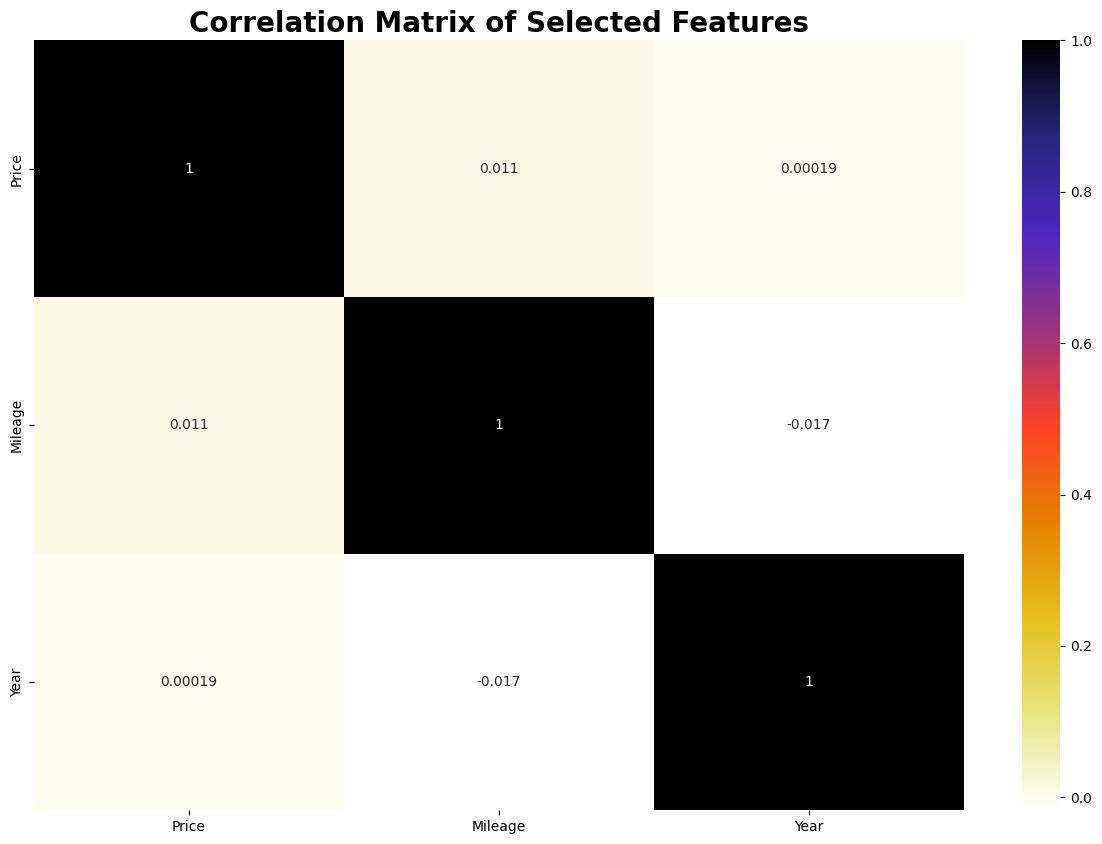

In [26]:
plt.figure(figsize = (15,10))
sns.heatmap(correlation_matrix, cmap="CMRmap_r", annot=True)
plt.title('Correlation Matrix of Selected Features', fontsize=20, fontweight='bold')
plt.show()

### Insights

#### Price and Mileage:

- Correlation Coefficient: 0.010685

- Insight: The correlation between Price and Mileage is very weak and positive. This suggests that there is almost no linear relationship between the price of the cars and their mileage. In practical terms, this means that higher mileage does not significantly affect the price of the cars in this dataset. Buyers may find cars with high mileage priced similarly to those with lower mileage, indicating that other factors (such as brand, model, condition, etc.) may play a more significant role in determining price.

#### Price and Year:

- Correlation Coefficient: 0.000188

- Insight: The correlation between Price and Year is also extremely weak and positive. This indicates that the year of manufacture has little to no impact on the price of the cars in this dataset. It suggests that newer cars are not necessarily priced higher than older models, which could be due to various factors such as the make and model of the car, market demand, or depreciation rates.

### Mileage and Year:

- Correlation Coefficient: -0.017118

- Insight: The correlation between Mileage and Year is slightly negative but very weak. This suggests that there is no significant relationship between the year of manufacture and the mileage of the cars. In other words, newer cars are not necessarily driven less than older cars, which could imply that some newer models may have been used extensively, or that older models may have been kept in better condition.

### Visualizing the mean selling price for every categorical column

In [27]:
df.dtypes

Make            object
Model           object
Year             int64
Price            int64
Mileage          int64
Body_Type       object
Transmission    object
Fuel_Type       object
Location        object
total_price      int64
dtype: object

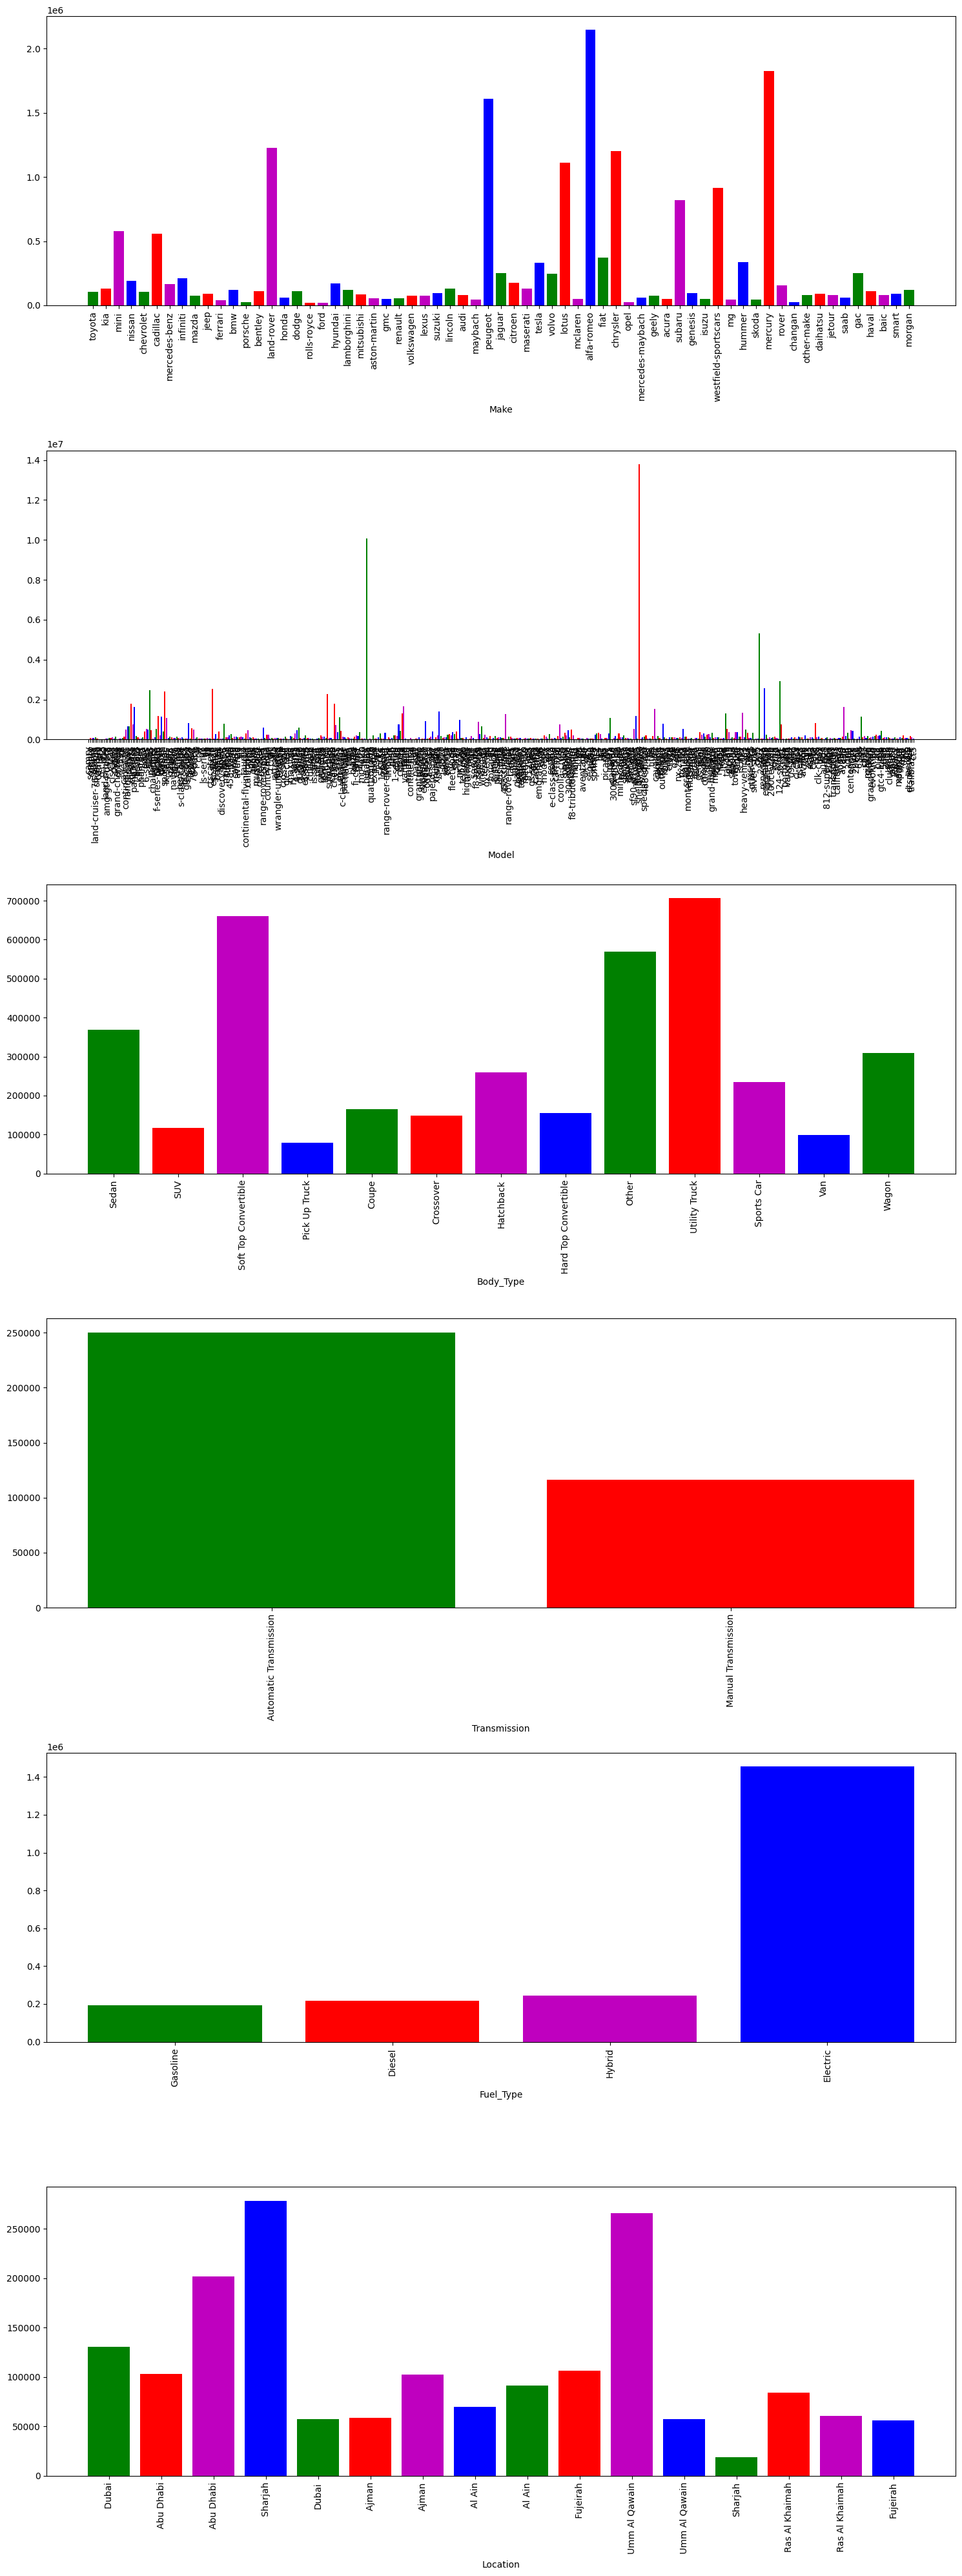

In [28]:
plt.figure(figsize=(15, 40))
colors = ['g', 'r', 'm', 'b']
for i in range(0, len(Categorical_features)):
    plt.subplot(6,1,i+1)
    cat_list = df[Categorical_features[i]].unique()
    cat_average = df.groupby(Categorical_features[i])['Price'].mean()
    plt.bar(cat_list, cat_average, color=colors)
    plt.xlabel(Categorical_features[i])
    plt.xticks(rotation=90)
plt.tight_layout()


##### Report

- Each Categorical features have different means which implies that each features have significant effiect on the target variable.

#### Checking Null Values in the dataset

In [29]:
df.isna().sum()

Make            0
Model           0
Year            0
Price           0
Mileage         0
Body_Type       0
Transmission    0
Fuel_Type       0
Location        0
total_price     0
dtype: int64

#### Continuous features and Price

In [30]:
continuous_features=[feature for feature in numeric_features if len(df[feature].unique())>=30]
print('Num of continues features :',continuous_features)

Num of continues features : ['Price', 'Mileage']


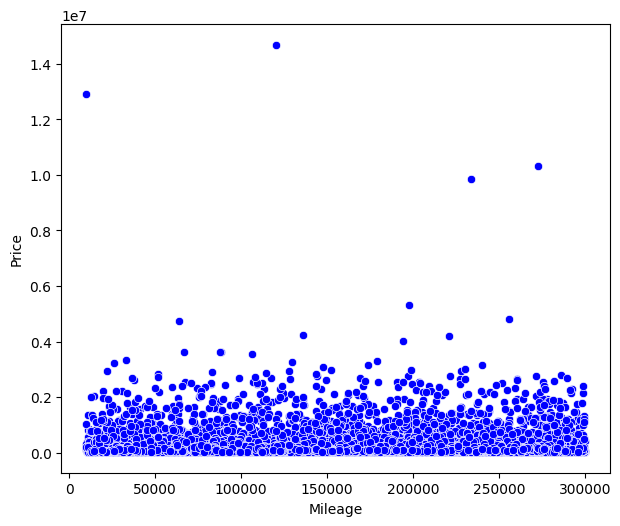

In [31]:
fig = plt.figure(figsize=(12, 10))

for i in range(0, len(continuous_features)):
    if continuous_features[i] != 'Price':
        ax = plt.subplot(2, 2, i+1)
        sns.scatterplot(data= df ,y='Price', x=continuous_features[i], color='b')
        plt.tight_layout()

### 5 Visualization


#### 4.1 Visualize the Target Feature

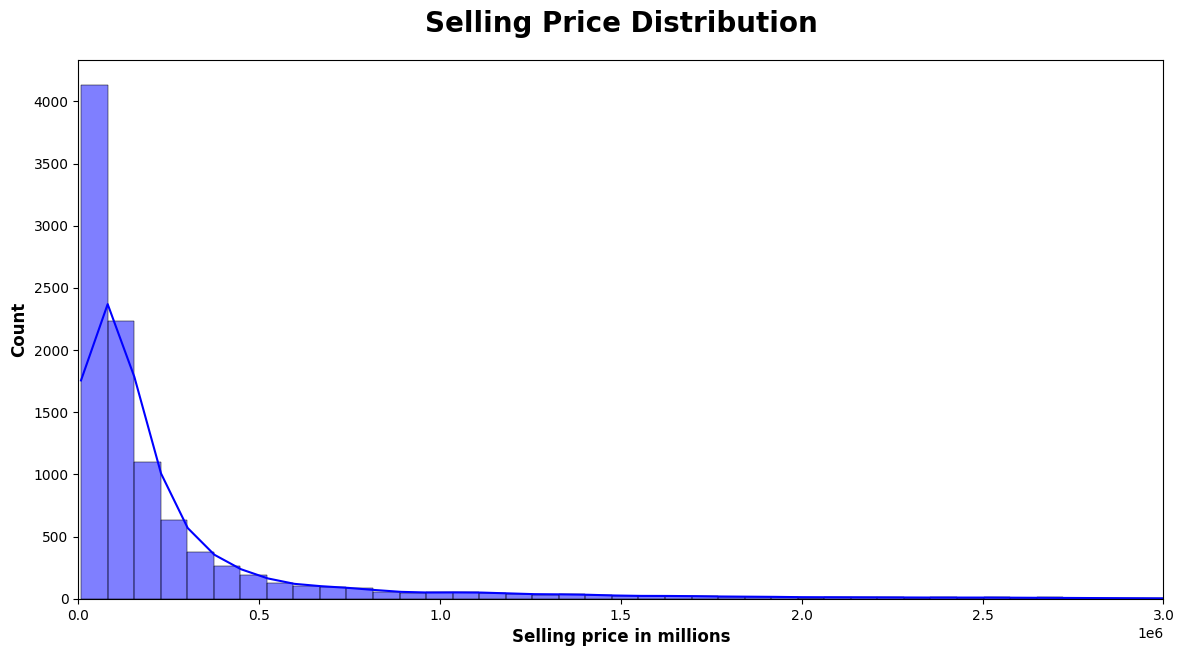

In [34]:
plt.subplots(figsize=(14,7))
sns.histplot(df.Price, bins=200, kde=True, color = 'b')
plt.title("Selling Price Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Selling price in millions", weight="bold", fontsize=12)
plt.xlim(0,3000000)
plt.show()

- from the chart it is clear that the Target Variable Skewed

#### Most Selling Car in UAE USED CAR

In [38]:
df['Make_Model'] = df['Make'].str.cat(df['Model'], sep=' ')
df.head()

,Make,Model,Year,Price,Mileage,Body_Type,Transmission,Fuel_Type,Location,total_price,Make_Model
0,toyota,camry,2016,47819,156500,Sedan,Automatic Transmission,Gasoline,Dubai,47819,toyota camry
1,kia,sorento,2013,61250,169543,SUV,Automatic Transmission,Gasoline,Abu Dhabi,61250,kia sorento
2,mini,cooper,2023,31861,221583,Soft Top Convertible,Automatic Transmission,Gasoline,Dubai,31861,mini cooper
3,nissan,altima,2016,110322,69754,Sedan,Automatic Transmission,Gasoline,Dubai,110322,nissan altima
4,toyota,land-cruiser-76-series,2020,139994,71399,Pick Up Truck,Manual Transmission,Gasoline,Dubai,139994,toyota land-cruiser-76-series


In [39]:
df.Make_Model.value_counts()[0:10]

Make_Model
nissan patrol                   386
mercedes-benz s-class           273
mercedes-benz g-class           257
toyota land-cruiser             208
land-rover range-rover-sport    198
mercedes-benz c-class           195
mercedes-benz e-class           191
land-rover range-rover          187
porsche cayenne                 172
mitsubishi pajero               161
Name: count, dtype: int64

- Most selling Car is Nissan patrol = 386

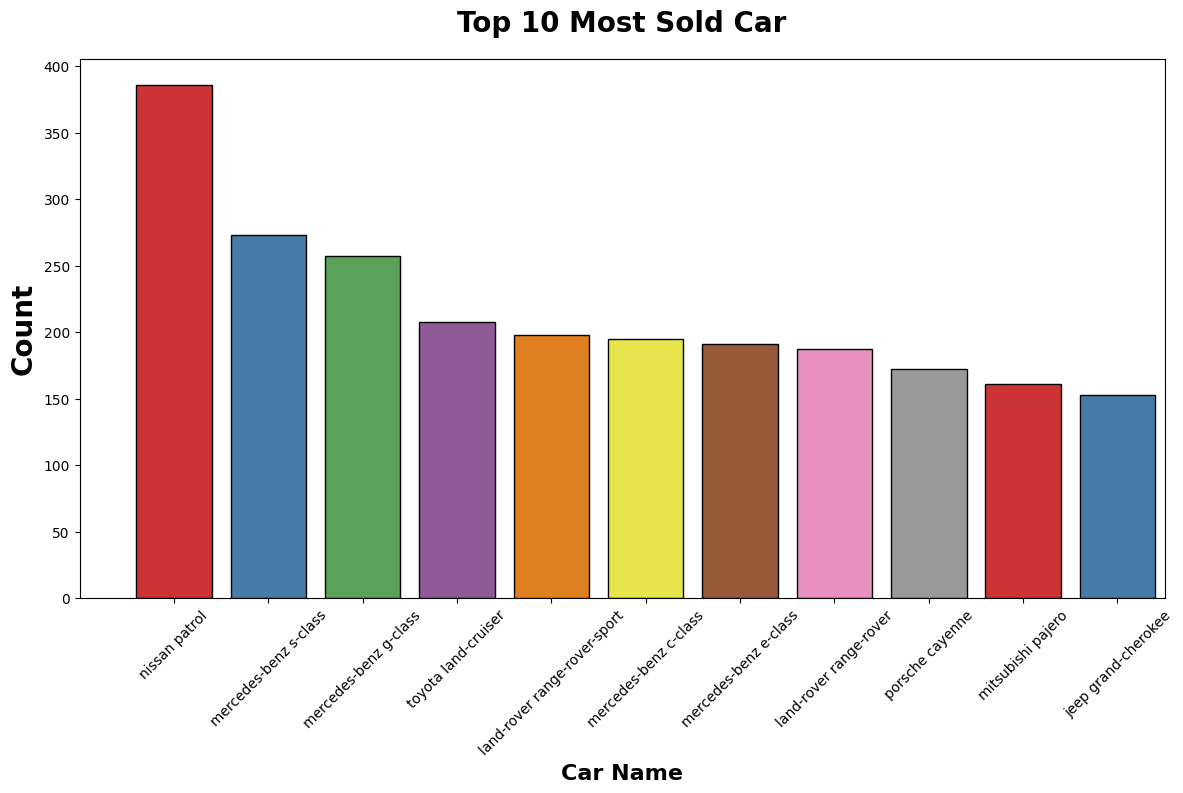

In [40]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Make_Model", data=df,ec = "black",palette="Set1",order = df['Make_Model'].value_counts().index)
plt.title("Top 10 Most Sold Car", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Car Name", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

### Check Mean Price of Nissan Patrol

In [43]:
patrol = df[df['Make_Model'] == 'nissan patrol']['Price'].mean()
print(f"Average Price of Nissan Patrol: {patrol} AED")

Average Price of Nissan Patrol: 162685.6968911917 AED


In [45]:
# 1. Calculate percentage for each model
sales_by_model = df.groupby('Make_Model')['Price'].sum()
model_percentages = (sales_by_model / sales_by_model.sum()) * 100
# 2. Get specific car percentage (e.g., Toyota Camry)
target_car = "nissan patrol"
target_percentage = model_percentages[target_car]
# 3. Display results
print("Percentage of total sales by model:")
print(model_percentages.round(2))
print(f"\n{target_car} represents {target_percentage:.2f}% of total sales")

Percentage of total sales by model:
Make_Model
acura rdx                               0.01
alfa-romeo 156159                       0.01
alfa-romeo 4c                           0.01
alfa-romeo giulia                       0.07
alfa-romeo giulietta                    0.02
                                        ... 
volvo s-class                           0.03
volvo v-class                           0.02
volvo xc60                              0.04
volvo xc90                              0.03
westfield-sportscars special-edition    0.01
Name: Price, Length: 520, dtype: float64

nissan patrol represents 2.56% of total sales


#### Report:

- As per the Chart these are top 10 most selling cars in used car from UAE
- Of the total cars sold nissan patrol shares 2.56%.
- Mean Price of Most Sold Car is 162685.6968911917 AED.


#### Most Selling Brand

In [46]:
df.Make.value_counts()[0:10]

Make
mercedes-benz    1486
nissan            925
toyota            893
bmw               698
ford              541
land-rover        538
porsche           450
audi              397
jeep              345
lexus             339
Name: count, dtype: int64

- Most Selling brand is mercedes-benz = 1486

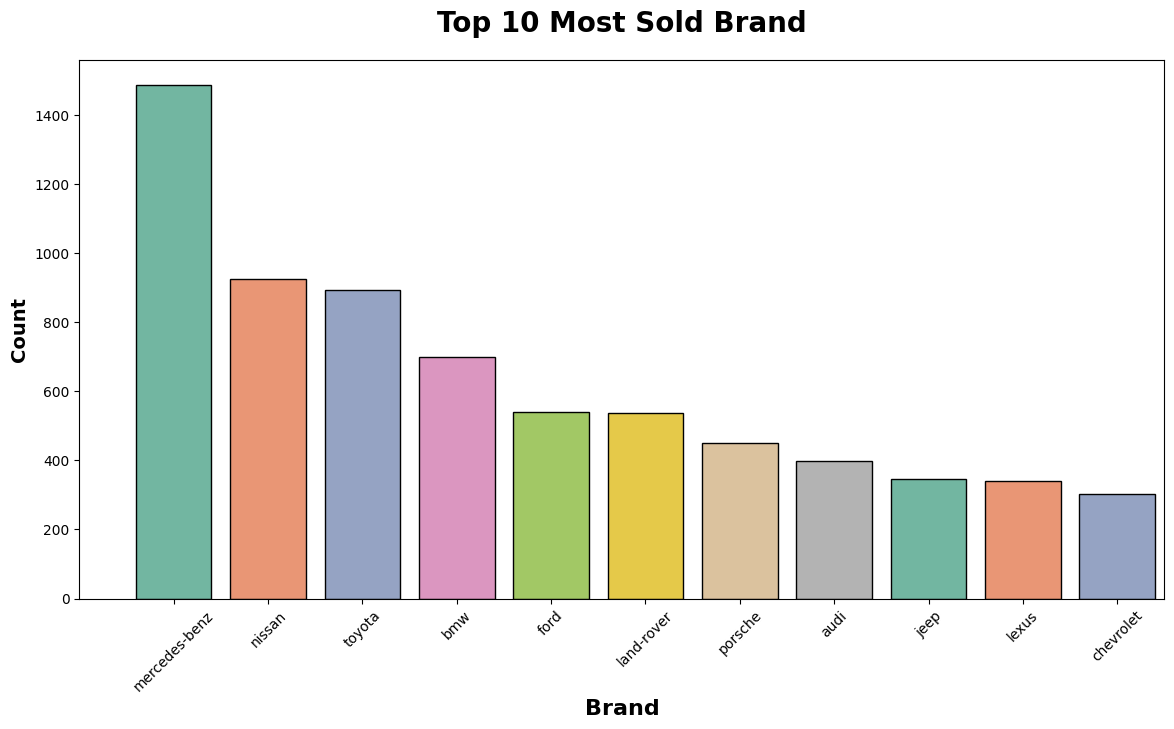

In [47]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Make", data=df,ec = "black",palette="Set2",order = df['Make'].value_counts().index)
plt.title("Top 10 Most Sold Brand", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=14)
plt.xlabel("Brand", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

#### Check the Mean price of Maruti brand which is most sold

In [50]:
Mercedes_benz = df[df['Make'] == 'mercedes-benz']['Price'].mean()
print(f'The mean price of mercedes-benz is: {Mercedes_benz} AED')

The mean price of mercedes-benz is: 372082.4993270525 AED


#### Report

- Mean price of Mercedes_benz is 372082.5 AED

### Costliest Brand

In [51]:
brand = df.groupby('Make').Price.max()
brand_df = brand.to_frame().sort_values('Price',ascending=False)[0:10]
brand_df

,Price
Make,
mclaren,14686975
mercedes-benz,4811366
ferrari,4728227
rolls-royce,3632160
lamborghini,3324525
bentley,2407299
land-rover,1878871
maybach,1745981
porsche,1732215


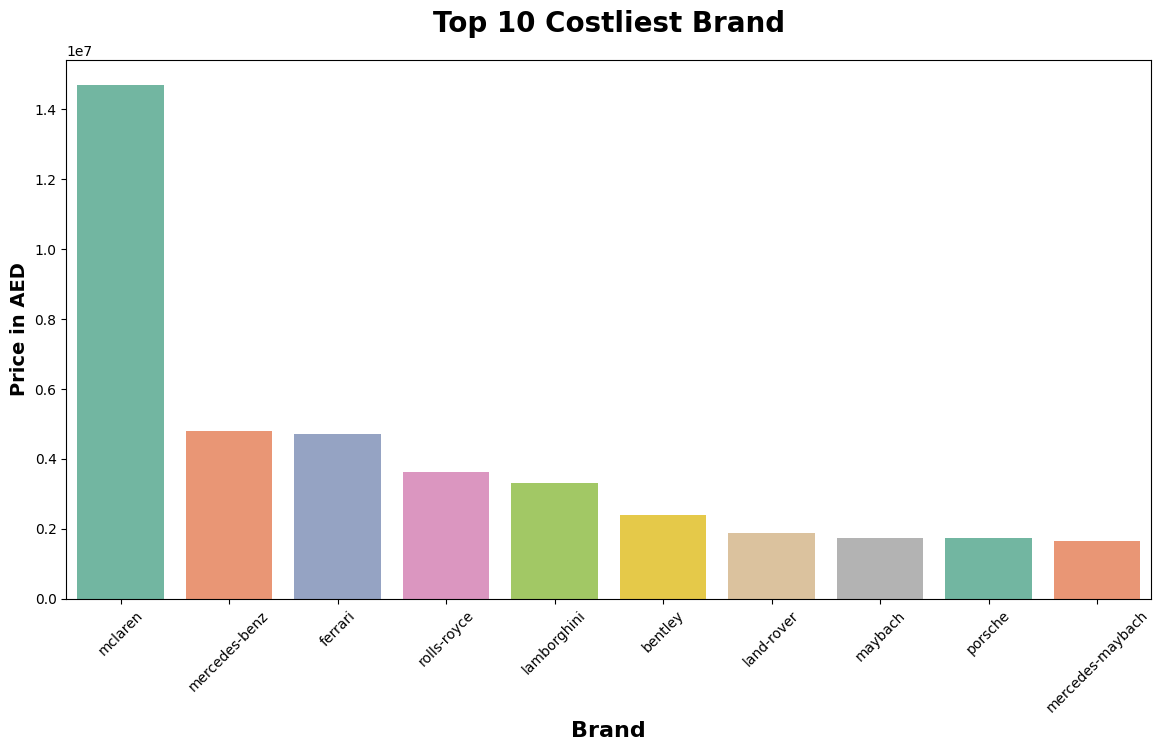

In [53]:
plt.subplots(figsize=(14,7))
sns.barplot(x=brand_df.index, y=brand_df['Price'], palette='Set2')
plt.title("Top 10 Costliest Brand", weight="bold",fontsize=20, pad=20)
plt.ylabel("Price in AED", weight="bold", fontsize=14)
plt.xlabel("Brand", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.show()

#### Reprot

- Costliest Brand sold is mclaren at 14686975 AED (1.4 Million).
- Second Most Costliest Brand sold is mercedes-benz at 4811366 AED.
- Brand Name has very clear impact on Price.

### Costliest Car

In [55]:
Car = df.groupby('Make_Model').Price.max()
Car_df = Car.to_frame().sort_values('Price',ascending=False)[0:10]
Car_df

,Price
Make_Model,
mclaren p1,14686975
mclaren elva,10308926
mclaren senna,5314704
mercedes-benz slr,4811366
ferrari 599,4728227
rolls-royce cullinan,3632160
rolls-royce ghost,3612298
lamborghini aventador,3324525
rolls-royce phantom,2990791


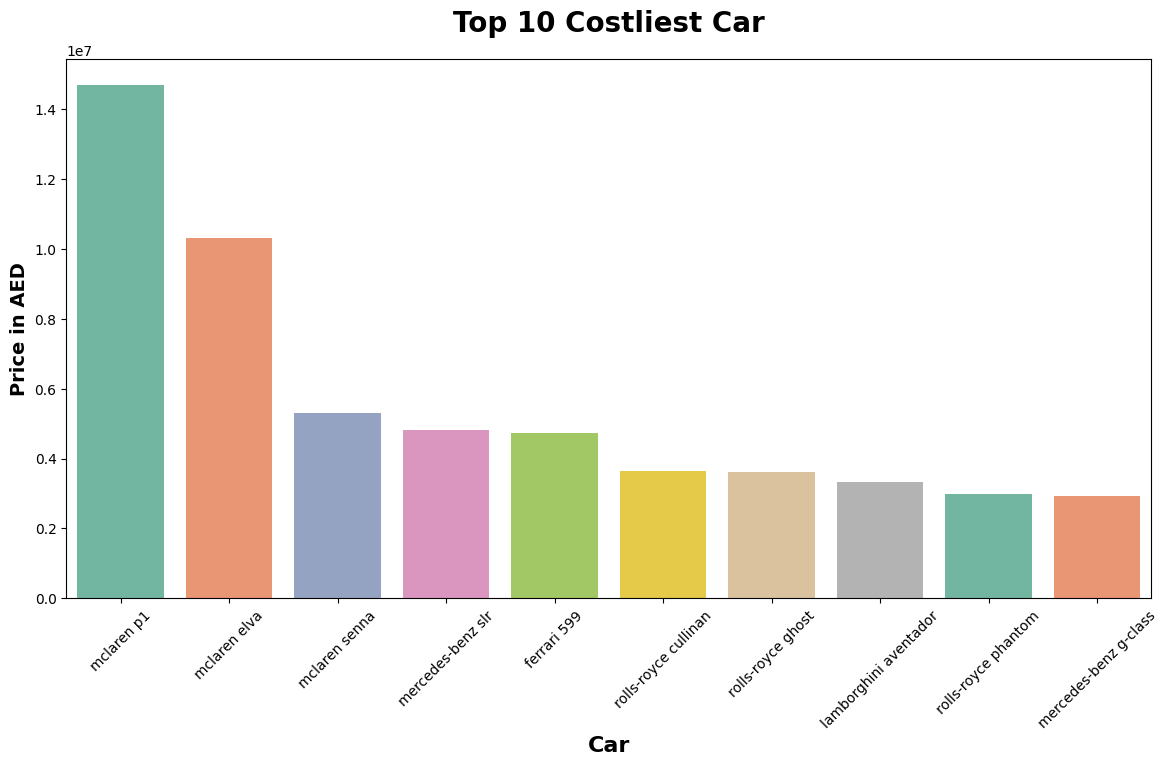

In [56]:
plt.subplots(figsize=(14,7))
sns.barplot(x=Car_df.index, y=Car_df['Price'], palette='Set2')
plt.title("Top 10 Costliest Car", weight="bold",fontsize=20, pad=20)
plt.ylabel("Price in AED", weight="bold", fontsize=14)
plt.xlabel("Car", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.show()

#### Report

- Costlist Car sold is mclaren P1 at 14686975 AED.
- Second Colstlist Car sold is mclaren elva at 10308926 AED.
- other than mclaren p1 and mclaren elva other car has priced below 1 million AED .

### Most Mileage Brand and Car Name

In [61]:
brand = df.groupby('Make').Mileage.max()
Car = df.groupby('Make_Model').Mileage.max()
brand_df = brand.to_frame().sort_values('Mileage',ascending=False)[0:10]
Car_df = Car.to_frame().sort_values('Mileage',ascending=False)[0:10]
print(brand_df)
print(Car_df)


               Mileage
Make                  
dodge           299996
toyota          299957
jeep            299920
volkswagen      299883
ford            299882
bmw             299837
audi            299793
mercedes-benz   299780
chevrolet       299644
rolls-royce     299599
                       Mileage
Make_Model                    
dodge ram               299996
toyota rav-4            299957
jeep grand-cherokee     299920
volkswagen id6          299883
ford mustang            299882
bmw 7-series            299837
ford explorer           299825
audi a8                 299793
mercedes-benz s-class   299780
ford f-series-pickup    299760


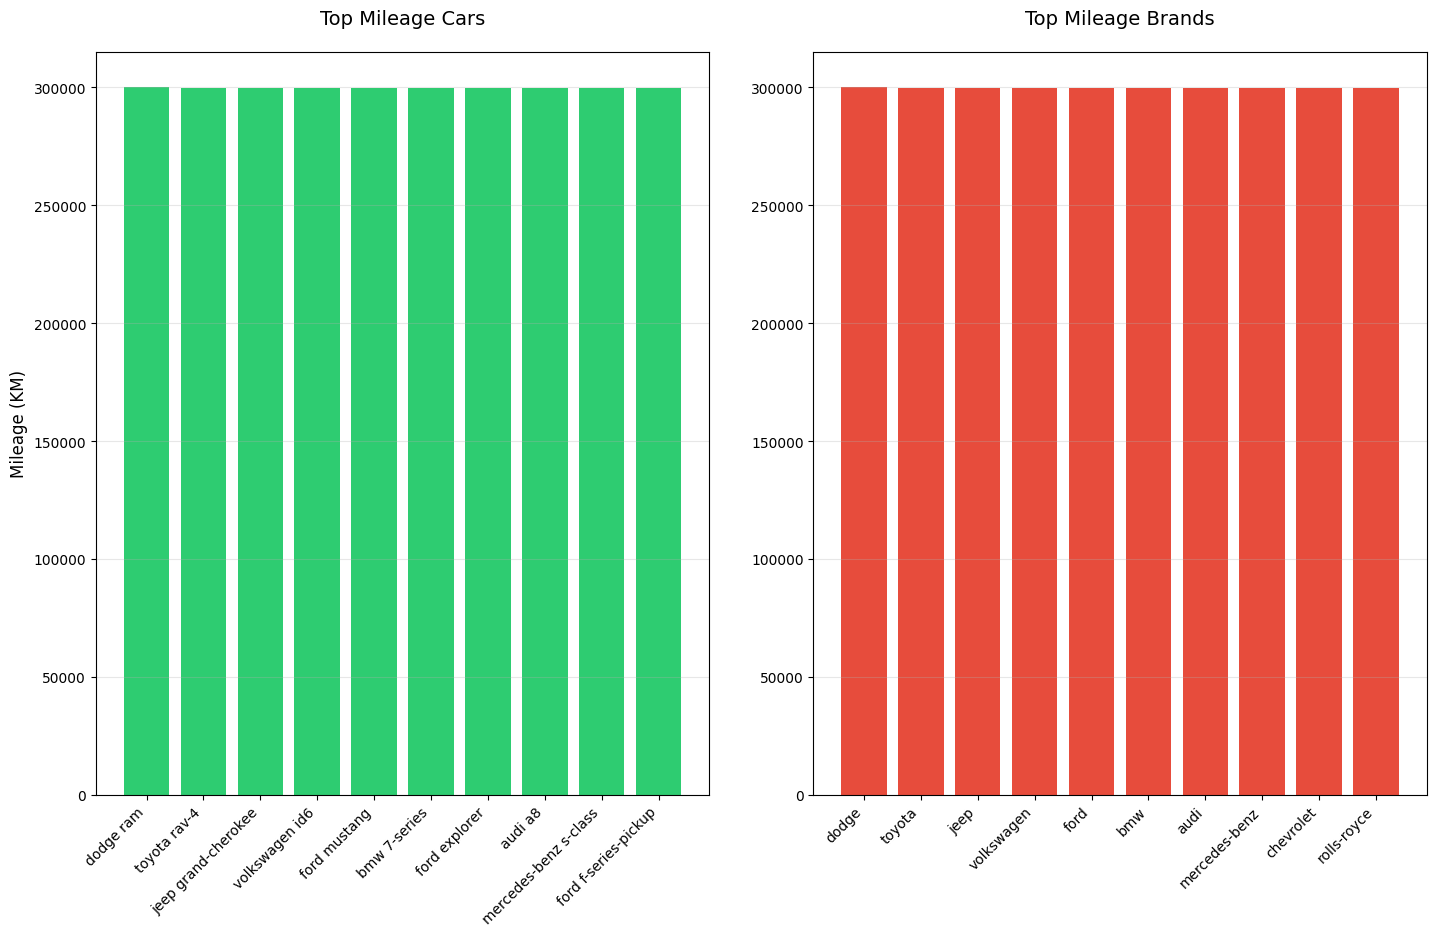

In [64]:
plt.figure(figsize=(15, 10))  # Wider than tall for side-by-side
colors = ['#2ecc71', '#e74c3c']  # Green for cars, red for brands
# Subplot 1: Cars
plt.subplot(1, 2, 1)  # 1 row, 2 cols, position 1
plt.bar(Car_df.index, Car_df['Mileage'], color=colors[0])
plt.title("Top Mileage Cars", fontsize=14, pad=20)
plt.ylabel("Mileage (KM)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
# Subplot 2: Brands
plt.subplot(1, 2, 2)  # 1 row, 2 cols, position 2
plt.bar(brand_df.index, brand_df['Mileage'], color=colors[1])
plt.title("Top Mileage Brands", fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout(pad=3.0)  # Prevents label overlap
plt.show()

### Fuel Type Selling Price


In [66]:
fuel = df.groupby('Fuel_Type')['Price'].median().sort_values(ascending=False)
fuel.to_frame()

,Price
Fuel_Type,
Electric,181353.0
Hybrid,172234.0
Diesel,146025.0
Gasoline,100685.5


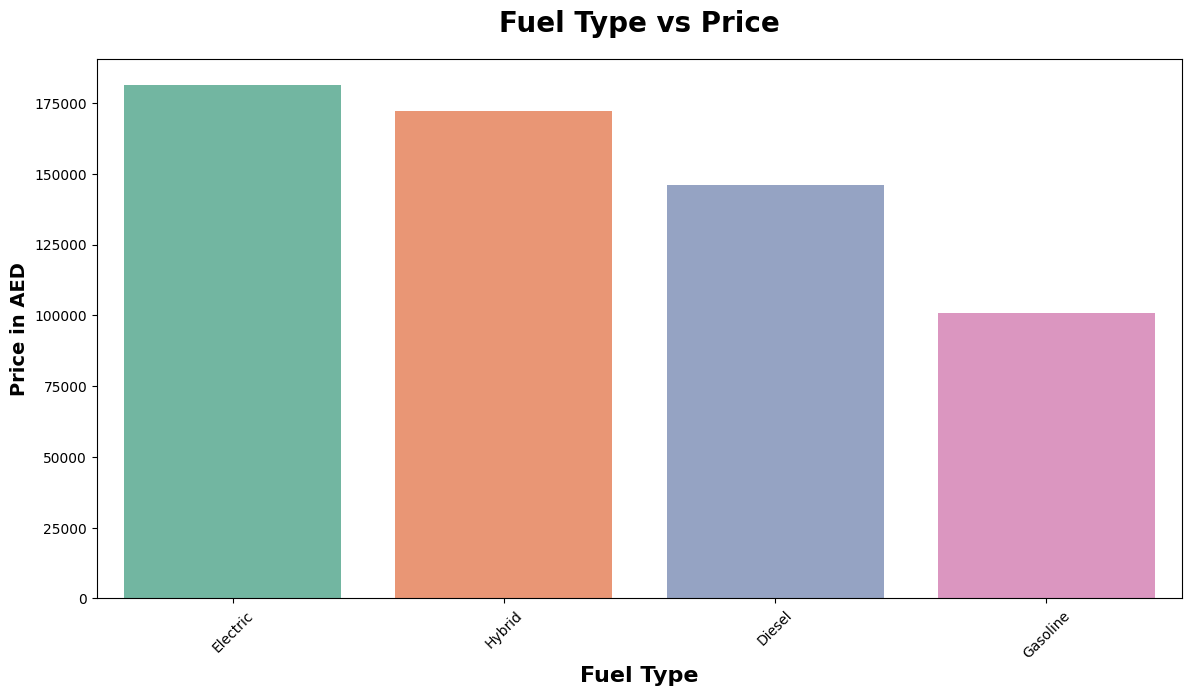

In [67]:
plt.subplots(figsize=(14,7))
sns.barplot(x=fuel.index, y=fuel.values, palette='Set2')
plt.title("Fuel Type vs Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Price in AED", weight="bold", fontsize=14)
plt.xlabel("Fuel Type", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.show()

#### Report

- Electric cars have highers selling average price.
- Followed by Hybrid and Diesel.
- Fuel Type is also important feature for the Target variable.


### Most sold Fuel type

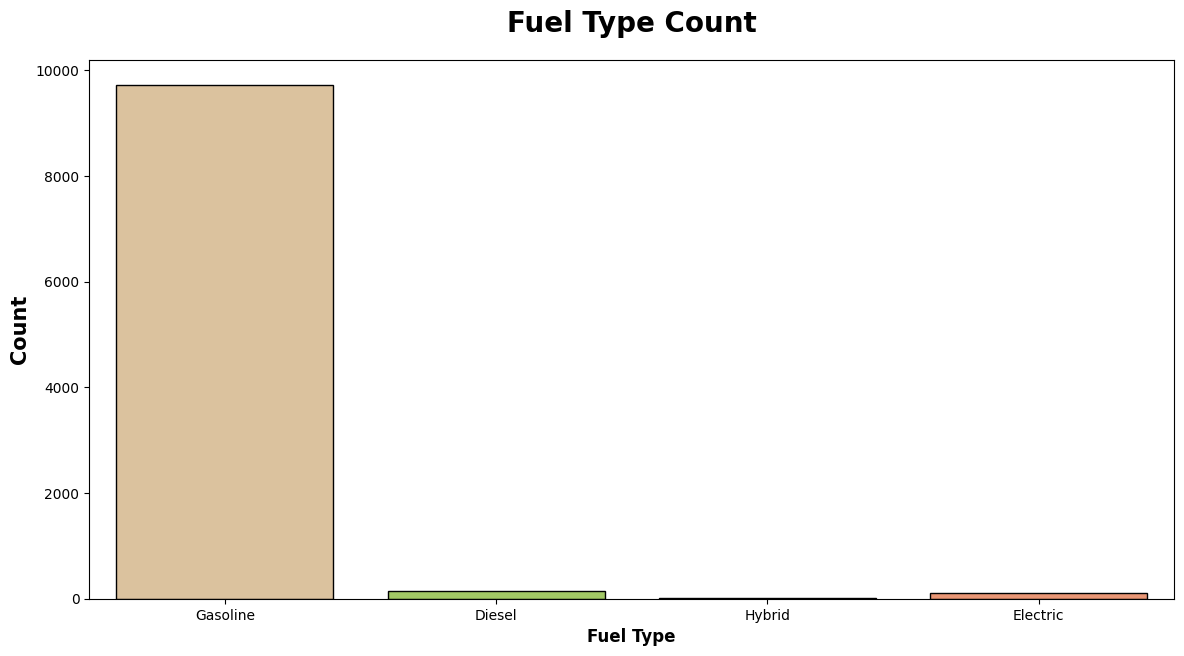

In [68]:
plt.subplots(figsize=(14,7))
sns.countplot(x=df.Fuel_Type, ec = "black", palette="Set2_r")
plt.title("Fuel Type Count", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Fuel Type", weight="bold", fontsize=12)
plt.show()

#### Report

- Gasoline dominate the used car market in UAE.
- Followed by Diesel and Electric and least sold is Hybrid

### Transmission Type

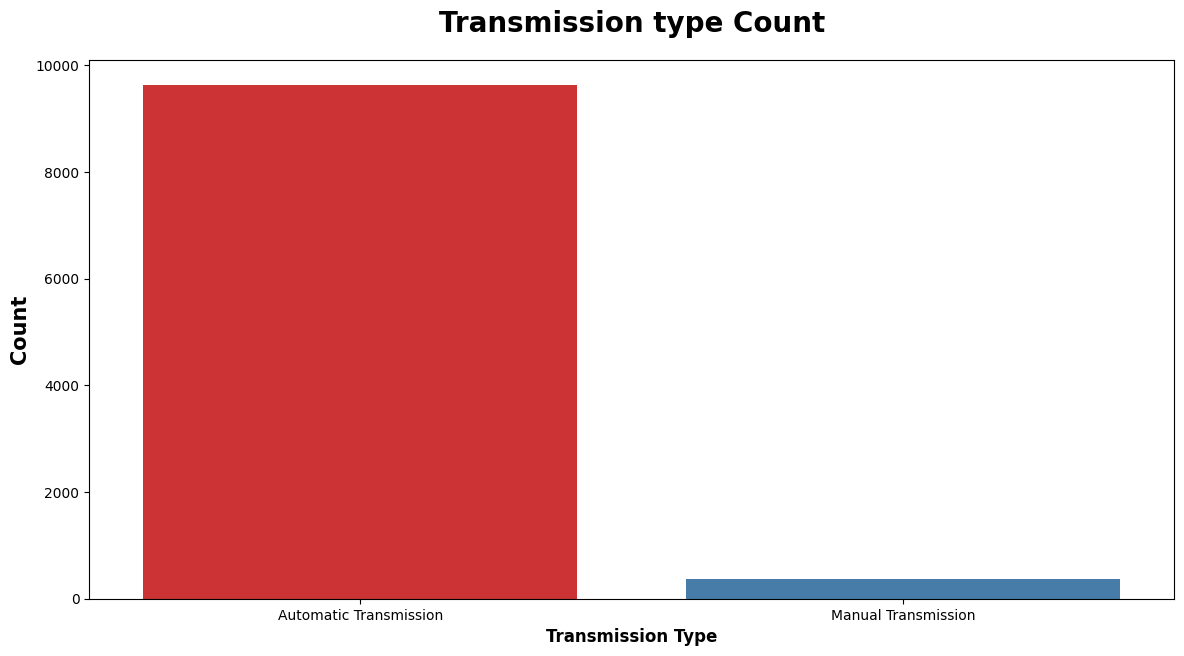

In [70]:
plt.subplots(figsize=(14,7))
sns.countplot(x='Transmission', data=df,palette="Set1")
plt.title("Transmission type Count", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Transmission Type", weight="bold", fontsize=12)
plt.show()

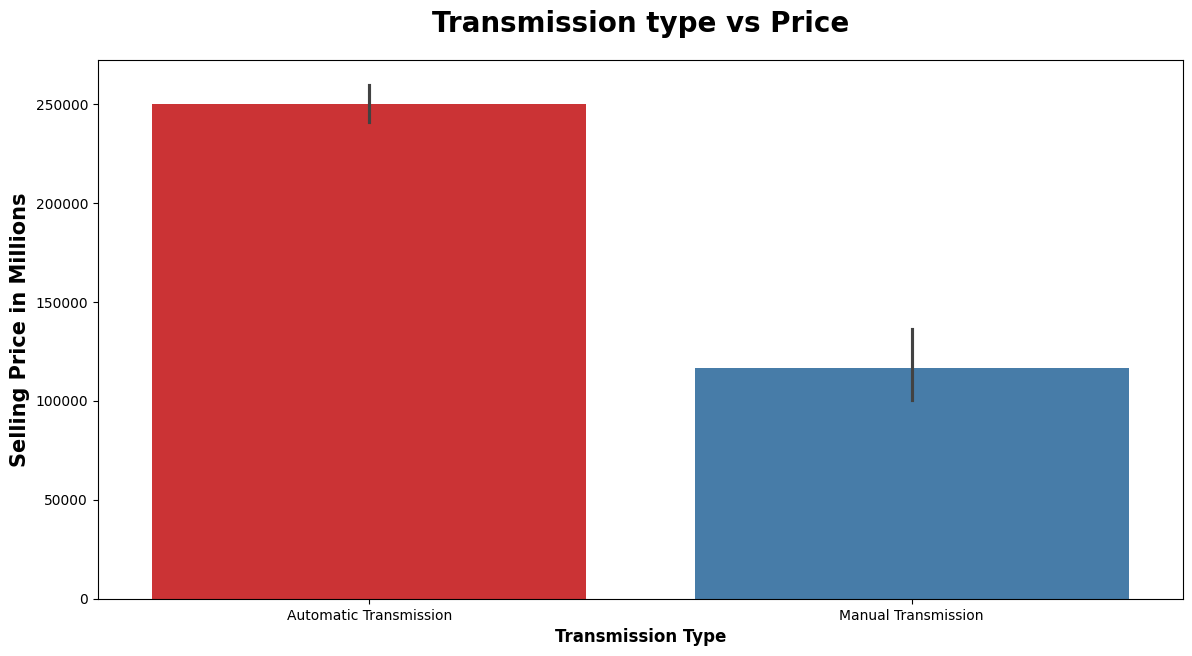

In [71]:
plt.subplots(figsize=(14,7))
sns.barplot(x='Transmission', y='Price', data=df,palette="Set1")
plt.title("Transmission type vs Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price in Millions", weight="bold", fontsize=15)
plt.xlabel("Transmission Type", weight="bold", fontsize=12)
plt.show() 

#### Report

- Automatic Transmission was found in most of the cars which was sold.
- Automatic cars have more selling price than manual cars.

### Final Report

- The dataset consists of 10,000 rows and 12 columns, with the correct data types and column names.
- The target variable for prediction is the `Price` of used cars, making this a regression problem.
- There are outliers present in the `Mileage`, `Price`, and `Year` columns, which may affect the model's performance.
- The analysis revealed that the average selling price of used cars is significantly influenced by various factors, including vehicle age, mileage, and brand.
- The dataset contains a diverse range of vehicles, with a substantial number of high-priced cars (over 200,000 AED) and low-mileage vehicles (under 50,000 km), suggesting a varied market catering to different buyer preferences.
- The most sold car in the dataset is the Nissan Patrol, with a significant market share, while the Mercedes-Benz brand is the most frequently sold brand.
- Fuel type analysis indicated that gasoline vehicles dominate the market, followed by diesel and electric vehicles, with electric cars having the highest average selling price.
- The analysis of transmission types revealed that automatic cars are more prevalent and tend to have higher selling prices compared to manual cars.
- Overall, the exploratory data analysis (EDA) provided valuable insights into the factors affecting used car prices in the UAE market, which can assist buyers and sellers in making informed decisions.
- Future steps will include data preprocessing, model training, and evaluation to develop a predictive model for used car prices.